In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from pydataset import data

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

from env import user, host, password
import acquire
import summarize
import prepare
import wrangle_mall as wm

np.random.seed(5)

In [2]:
df = pd.read_csv("relationships.csv", header=None, names=["fem_age", "male_age", "id", "issue"])
df.head()

,fem_age,male_age,id,issue
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Facebook profile
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Did I ask her out on a date?
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is being flirtatious or is she just being friendly
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is being very flirtatious or just friendly
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing each other for a few months. Got some Qu...


In [3]:
df.dtypes

fem_age      int64
male_age     int64
id          object
issue       object
dtype: object

In [4]:
df.describe()

,fem_age,male_age
count,"47,540.00","47,540.00"
mean,23.05,24.27
std,23.44,6.32
min,0.00,5.00
25%,19.00,20.00
50%,22.00,23.00
75%,25.00,27.00
max,"5,000.00",420.00


- There are some extreme outliers I need to remove from the ages.

In [5]:
df = wm.remove_outliers_iqr(df, columns=["fem_age", "male_age"], k=3)

In [6]:
df.describe()

,fem_age,male_age
count,"46,989.00","46,989.00"
mean,22.72,24.02
std,4.63,5.35
min,2.00,5.00
25%,19.00,20.00
50%,22.00,23.00
75%,25.00,27.00
max,43.00,48.00


In [7]:
df = df.drop(columns=["id", "issue"])

In [8]:
df.fem_age.value_counts(). sort_index()

2        1
3        4
5        2
6        1
7        1
9        4
10       1
11       4
12      10
13      32
14     180
15     488
16    1363
17    2004
18    3939
19    4103
20    4902
21    4598
22    4080
23    3861
24    3492
25    2988
26    2312
27    1862
28    1563
29    1181
30    1086
31     624
32     544
33     409
34     306
35     297
36     184
37     127
38     120
39      80
40     113
41      57
42      43
43      23
Name: fem_age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b3479b0>,
      dtype=object)

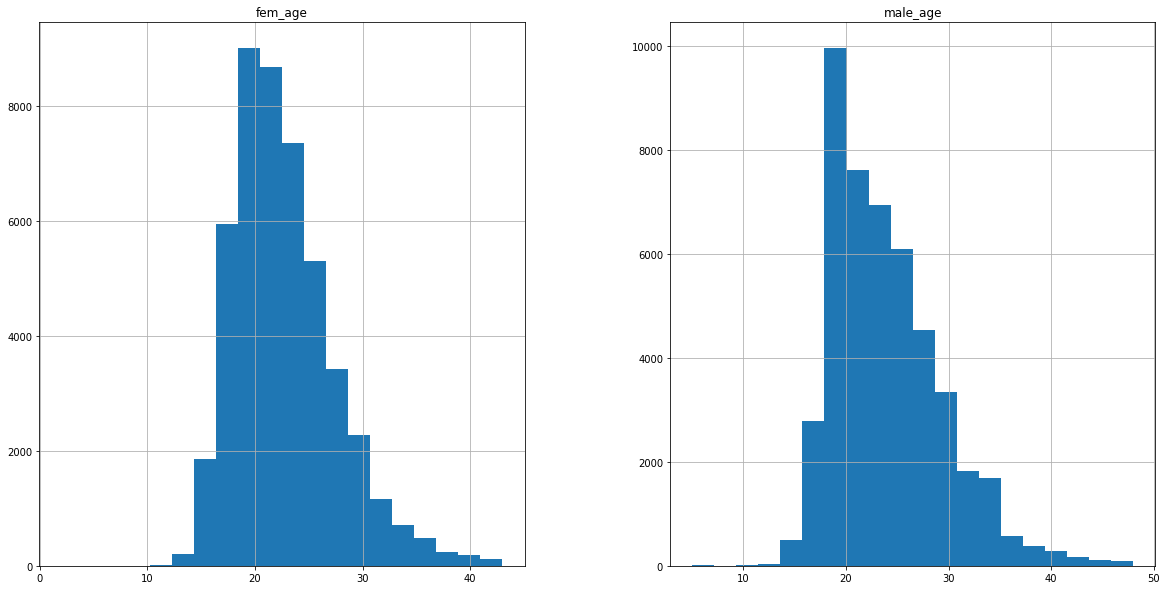

In [9]:
df.hist(figsize=(20, 10), bins=20)

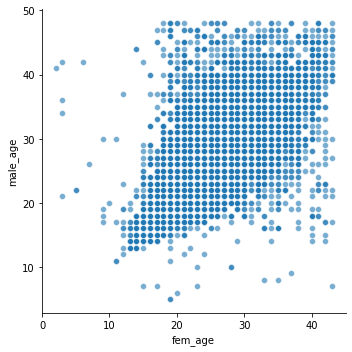

In [10]:
sns.relplot(data=df, x="fem_age", y="male_age", alpha=.6)

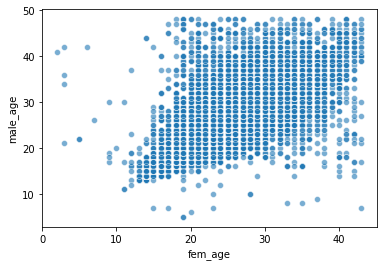

In [11]:
sns.scatterplot(data=df, x="fem_age", y="male_age", alpha=.6)

In [12]:
kmeans = KMeans(n_clusters=6)

In [13]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centers

,fem_age,male_age
0,20.60,21.46
1,28.71,28.95
2,23.79,25.41
3,17.45,17.81
4,34.81,36.95
5,25.27,35.04


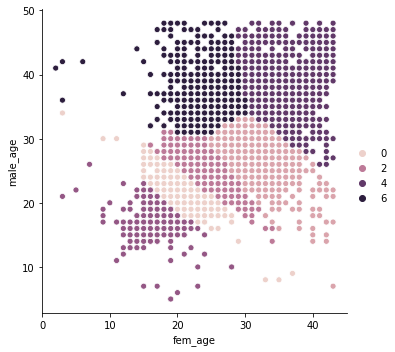

In [15]:
sns.relplot(data=df, hue=kmeans.labels_, x='fem_age', y='male_age')

In [16]:
df["cluster"] = kmeans.predict(df) 

In [17]:
df.head(20)

,fem_age,male_age,cluster
0,24,25,2
1,18,20,3
2,17,16,3
3,17,16,3
4,26,22,2
5,35,42,4
6,24,26,2
7,26,25,2
8,22,38,5
9,30,30,1


In [18]:
df.cluster = "cluster" + df.cluster.astype(str)

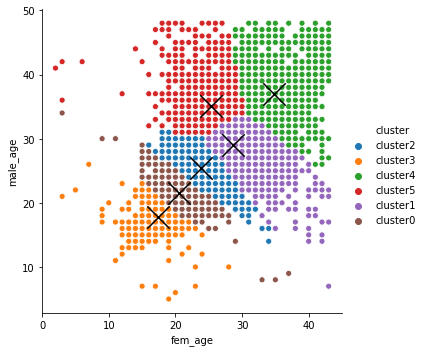

In [22]:
sns.relplot(data=df, y='male_age', x='fem_age', hue='cluster')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=500, c='black')